# WindLab

Este notebook exemplifica a utilização do pacote WindLab, desenvolvido para facilitar a leitura, análise e visualização de dados de instrumentos LIDAR, como Wind Cube e Zephyr. O WindLab automatiza a manipulação de dados, permitindo realizar cálculos estatísticos, gerar gráficos (como rosa dos ventos) e exportar resultados em formatos como CSV, ideal para relatórios técnicos e publicações científicas.

Neste notebook, apresentaremos exemplos práticos das principais funcionalidades do WindLab.

## Configuração do Ambiente

Esta seção fornece um guia passo a passo para criar um ambiente Conda (ou virtual) para o WindLab, instalar os módulos necessários a partir do `requirements.txt` e adicionar o ambiente ao Jupyter Notebook. 

### Passo 1: Criar o Ambiente Conda

Primeiro, crie um novo ambiente Conda chamado `windlab` com Python 3.10 ou superior. Execute os comandos abaixo no **terminal**:

```bash
# Criar um novo ambiente Conda chamado 'windlab' com Python 3.10
conda create -n windlab python=3.10

# Ativar o ambiente
conda activate windlab
```

### Passo 2: Instalar os Pacotes Necessários

Com o ambiente ativado, instale todas as dependências necessárias a partir do arquivo `requirements.txt`. No terminal, execute:

```bash
# Instalar os pacotes necessários
pip install -r requirements.txt
```

### Passo 3: Adicionar o Ambiente ao Jupyter

Para trabalhar com este ambiente no Jupyter Notebook, é necessário adicioná-lo como um kernel. Execute os seguintes comandos no terminal:

```bash
# Instalar o pacote ipykernel
pip install ipykernel

# Adicionar o ambiente ao Jupyter
python -m ipykernel install --user --name=windlab --display-name "Python (windlab)"
```

### Passo 4: Verificar a Configuração

Para verificar se tudo está configurado corretamente, execute o seguinte comando em uma célula do Jupyter Notebook:
```bash
import sys
print(sys.executable)
```

Esse comando deve retornar o caminho do ambiente windlab. Agora, você está pronto para utilizar o pacote WindLab no Jupyter Notebook!

## Adcionar Caminho do Projeto ao Ambiente

Para a utilização desse notebook, primeiro temos que ajustar o ambiente para que possamos importar os módulos do pacote. Para isso, vamos adicionar o caminho do projeto ao sys.path manualmente:

In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

## Leitura e manipulação de dados

O primeiro passo na utilização do programa envolve a leitura de um arquivo bruto de dados e sua manipulação. Para isso, o **WindLab** utiliza as bibliotecas **Pandas** e **Xarray**:

- **Pandas** é responsável por ler o arquivo bruto tabulado do LIDAR.
- **Xarray** transforma os dados em um objeto multidimensional (3D), permitindo uma manipulação mais intuitiva e facilitada, semelhante a trabalhar com arquivos NetCDF.

No repositório, há uma pasta `testdata`, com dados para teste, referentes ao mês de agosto de 2024. Abaixo, vamos abrir o primeiro dado dessa pasta como exemplo.

In [5]:
from windlab import WindDataAccessor

ds = WindDataAccessor.windcube("../testdata/2024/WLS866-104_2024_08_01__10_09_14.rtd")
print(ds)

<xarray.Dataset> Size: 18MB
Dimensions:             (height: 7, time: 62308)
Coordinates:
  * time                (time) datetime64[ns] 498kB 2024-08-01T10:09:14.15000...
  * height              (height) int64 56B 40 50 60 70 100 120 150
Data variables:
    Wind Speed (m/s)    (height, time) float64 3MB nan 4.11 4.11 ... 7.66 7.61
    Wind Direction (°)  (height, time) float64 3MB nan 120.3 ... 89.21 89.21
    X-wind (m/s)        (height, time) float64 3MB nan -2.071 ... 0.106 0.106
    Y-wind (m/s)        (height, time) float64 3MB nan 3.548 ... 7.657 7.612
    Z-wind (m/s)        (height, time) float64 3MB -29.1 -29.1 ... -29.1 -29.1


Podemos ver que o objeto gerado possui as coordenadas **tempo** e **altura**, além de diferentes variáveis, como a **velocidade do vento**, suas componentes nos eixos **X, Y e Z**, e a **direção do vento** (em graus). 

### Importante:
A altura indicada está relativa ao nível do mar mais a altura do aparelho instalado. Por exemplo, se o Wind Cube está instalado a 100m do nível do mar, soma-se a altura do feixe de luz medido à altura de referência. 

Como o metadado do arquivo não especifica a altura de referência do aparelho, essa altura deve ser passada pelo usuário como argumento no momento de construir o dataset. Veja um exemplo abaixo:

In [8]:
ds = WindDataAccessor.windcube("../testdata/2024/WLS866-104_2024_08_01__10_09_14.rtd", reference_height=100)
print(ds)

<xarray.Dataset> Size: 18MB
Dimensions:             (height: 7, time: 62308)
Coordinates:
  * time                (time) datetime64[ns] 498kB 2024-08-01T10:09:14.15000...
  * height              (height) int64 56B 140 150 160 170 200 220 250
Data variables:
    Wind Speed (m/s)    (height, time) float64 3MB nan 4.11 4.11 ... 7.66 7.61
    Wind Direction (°)  (height, time) float64 3MB nan 120.3 ... 89.21 89.21
    X-wind (m/s)        (height, time) float64 3MB nan -2.071 ... 0.106 0.106
    Y-wind (m/s)        (height, time) float64 3MB nan 3.548 ... 7.657 7.612
    Z-wind (m/s)        (height, time) float64 3MB -29.1 -29.1 ... -29.1 -29.1


### Seleção de tempos e alturas específicas

Uma vez que os dados são carregados no formato `xarray.Dataset`, o **Xarray** oferece métodos fáceis e eficientes para selecionar intervalos de tempo e alturas específicas. Isso pode ser feito utilizando os métodos `.sel` (seleção por coordenadas) e `.isel` (seleção por índices).

#### Método `.sel`: Seleção por coordenadas

O método `.sel` permite selecionar dados com base nos valores exatos das coordenadas, como datas e alturas específicas. Por exemplo, você pode selecionar dados para um período de tempo ou uma altura específica em metros.

**Exemplo: Seleção por intervalo de tempo e altura específica**

In [9]:
ds_subset = ds.sel(time=slice('2024-08-01T00:00:00', '2024-08-01T02:00:00'), height=140)
print(ds_subset)

<xarray.Dataset> Size: 8B
Dimensions:             (time: 0)
Coordinates:
  * time                (time) datetime64[ns] 0B 
    height              int64 8B 140
Data variables:
    Wind Speed (m/s)    (time) float64 0B 
    Wind Direction (°)  (time) float64 0B 
    X-wind (m/s)        (time) float64 0B 
    Y-wind (m/s)        (time) float64 0B 
    Z-wind (m/s)        (time) float64 0B 


Neste exemplo, selecionamos o intervalo de tempo desejado usando a função `slice`, e a altura é escolhida diretamente com o valor exato (neste caso, 150 metros). Isso permite visualizar os dados apenas para aquele intervalo e altura.

#### Método `.isel`: Seleção por índices 

O método `.isel` permite a seleção de dados com base nos índices das coordenadas, ou seja, você pode escolher as posições numéricas das coordenadas de tempo e altura em vez de seus valores exatos.

In [10]:
# Selecionando os primeiros 100 passos de tempo e o primeiro índice de altura
ds_subset = ds.isel(time=slice(0, 100), height=0)
print(ds_subset)

<xarray.Dataset> Size: 5kB
Dimensions:             (time: 100)
Coordinates:
  * time                (time) datetime64[ns] 800B 2024-08-01T10:09:14.150000...
    height              int64 8B 140
Data variables:
    Wind Speed (m/s)    (time) float64 800B nan 4.11 4.11 4.11 ... 5.0 4.85 4.81
    Wind Direction (°)  (time) float64 800B nan 120.3 120.3 ... 114.2 114.4
    X-wind (m/s)        (time) float64 800B nan -2.071 -2.071 ... -1.985 -1.985
    Y-wind (m/s)        (time) float64 800B nan 3.548 3.548 ... 4.421 4.378
    Z-wind (m/s)        (time) float64 800B -29.1 -29.1 -29.1 ... -29.1 -29.1


Neste exemplo, estamos selecionando os primeiros 100 passos de tempo e o primeiro índice de altura no dataset. O primeiro índice de altura corresponde à menor altura no dataset (por exemplo, se as alturas são 50, 60 e 70 metros, o índice 0 corresponde a 50 metros).

### Plotagem da velocidade do vento em uma única altura

Para facilitar a visualização da velocidade do vento, o **WindLab** possui uma função embutida chamada `plot_variable`. Com esta função, o usuário pode facilmente gerar gráficos de variáveis, como a velocidade do vento, para um nível específico de altura.

#### Função `plot_variable`

A função `plot_variable` gera um gráfico simples da variável desejada para a altura especificada. Isso é útil quando o usuário quer visualizar rapidamente a evolução da velocidade do vento ao longo do tempo para uma única altura, sem a necessidade de realizar operações adicionais.

#### Parâmetros de entrada:
- **height** (*int*): A altura em metros para a qual a variável será plotada.
- **variable** (*str*): A variável a ser plotada (por padrão, `'Wind Speed (m/s)'`).

#### Exemplo prático:

Neste exemplo, vamos visualizar a **velocidade do vento**, a **componente X do vento** e a **direção do vento** para uma altura de 140 metros. Além da plotagem básica, o usuário pode personalizar o gráfico gerado através do objeto `ax`, que representa o eixo do gráfico. Abaixo estão algumas customizações possíveis:

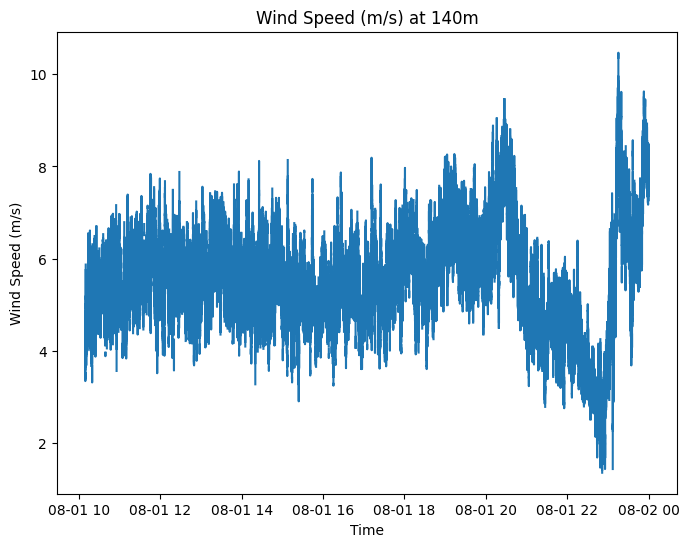

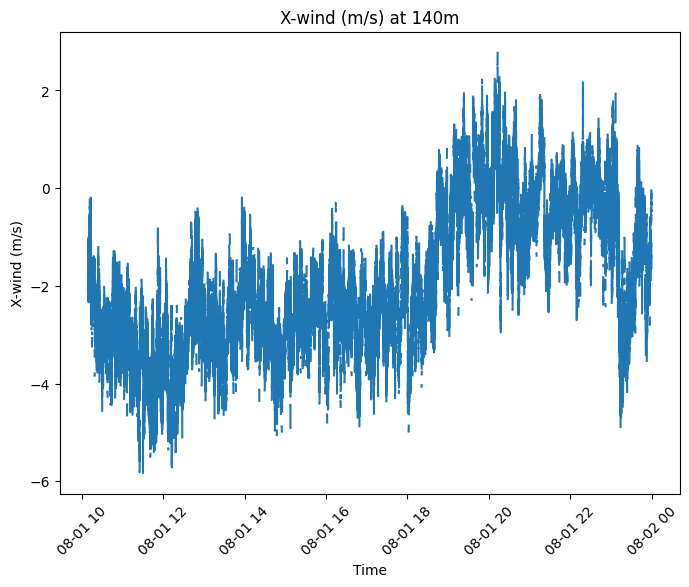

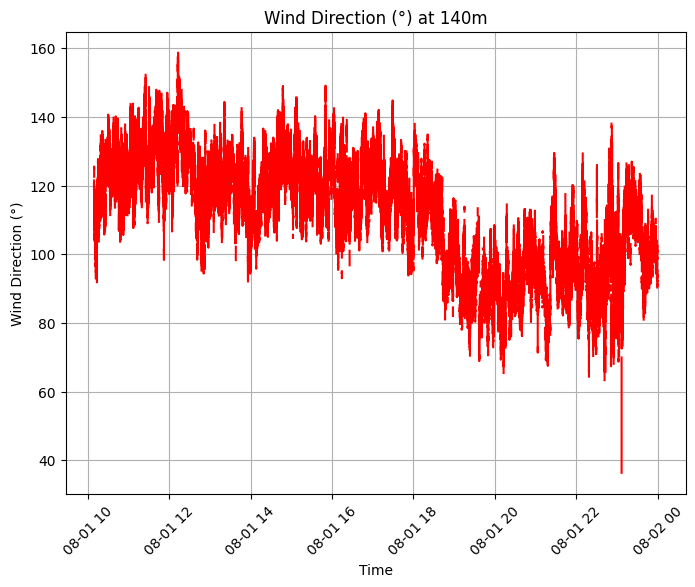

In [11]:
# Velocidade do vento
ax = ds.wind_graph.plot_variable(height=140, variable='Wind Speed (m/s)')

# Componente X
ax = ds.wind_graph.plot_variable(140, 'X-wind (m/s)')
ax.tick_params(axis='x', labelrotation=45)  # Rotaciona os rótulos do eixo X

# Direção do vento
ax = ds.wind_graph.plot_variable(140, 'Wind Direction (°)')
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True)  # Ativa o grid no gráfico
line = ax.lines[0] # Capturando a linha gerada
line.set_color('red')  # Define a cor da linha para vermelho

### Obter dados de velocidade e direção do vento em formato de DataFrame

O **WindLab** oferece uma função para extrair os dados de velocidade e direção do vento para uma altura específica e convertê-los diretamente em um `pandas.DataFrame`. Isso é útil quando se deseja trabalhar com os dados em um formato mais tabular, por exemplo, para fazer cálculos adicionais ou exportar os dados para um arquivo CSV.

#### Função `get_wind_df`

A função `get_wind_df` retorna um `DataFrame` com as colunas 'Wind Speed (m/s)' e 'Wind Direction (°)' para a altura especificada.

#### Parâmetros de entrada:
- **height** (*int*): A altura em metros para a qual os dados serão extraídos.

#### Exemplo prático:

Neste exemplo, vamos obter a velocidade e a direção do vento a 40 metros e visualizar os primeiros dados retornados:

In [12]:
# Importar o módulo para exportação
from windlab.processing.utils import get_wind_df

# Obter um DataFrame com velocidade e direção do vento a 140 metros
df = get_wind_df(ds, 140)
print(df.head())

                         Wind Speed (m/s)  Wind Direction (°)
Time                                                         
2024-08-01 10:09:14.150               NaN                 NaN
2024-08-01 10:09:14.950              4.11              120.27
2024-08-01 10:09:15.750              4.11              120.27
2024-08-01 10:09:16.550              4.11              120.27
2024-08-01 10:09:17.350              4.11              120.27


### Visualização de Rosas dos Ventos

Uma funcionalidade bastante útil do **WindLab** é a possibilidade de gerar rosas dos ventos a partir dos dados de velocidade e direção do vento em diferentes alturas. A função `plot_wind_rose` permite que você visualize uma rosa dos ventos para uma altura específica, com a possibilidade de calcular médias em janelas de tempo específicas.

#### Parâmetros da Função `plot_wind_rose` 

* **`height`**: Altura (em metros) para a qual será gerada a rosa dos ventos.
* **`averaging_window`**: (Opcional) Janela de tempo para calcular a média dos dados. O formato segue as regras do Pandas, como `'1h'` para média horária, `'10T'` para média a cada 10 minutos, etc.
* **`colormap`**: (Opcional) O mapa de cores utilizado para a plotagem. O valor padrão é `'viridis'`, mas você pode escolher diferentes colormaps como `'coolwarm'`, `'plasma'`, etc.
* **`period`**: (Opcional) Um período para filtrar os dados. Pode ser um mês específico (por exemplo, `'January'`, `'February'`) ou uma estação do ano (usando os códigos meteorológicos `'DJF'` para verão austral, `'JJA'` para inverno austral, etc.).
* **Retorno**: A função retorna o objeto `WindroseAxes` para que você possa modificar ou salvar o gráfico posteriormente.

#### Exemplo 1: Plotar a Rosa dos Ventos sem Média

No exemplo abaixo, plotamos a rosa dos ventos para a altura de 140 metros sem realizar médias temporais.

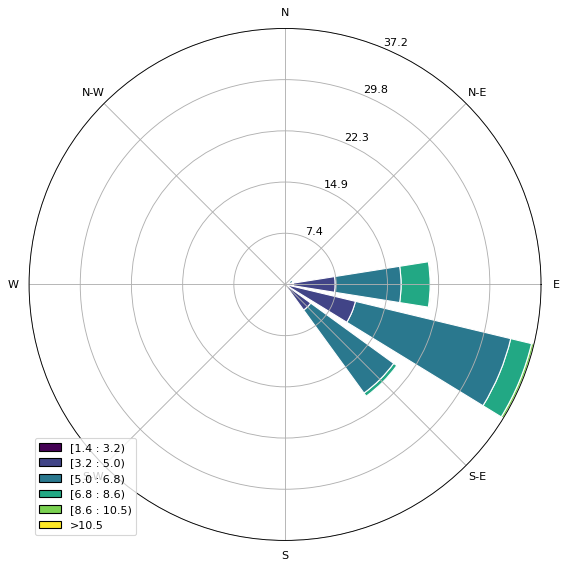

In [13]:
# Importar o Matplotlib para exibir os gráficos
import matplotlib.pyplot as plt

# Plotar a rosa dos ventos para a altura de 140 metros sem média temporal
ax = ds.wind_graph.plot_wind_rose(140)
plt.show()

#### Exemplo 2: Plotar a Rosa dos Ventos com Média Temporal 

A função `plot_wind_rose` também permite calcular médias para diferentes janelas de tempo. Abaixo, mostramos como calcular a média de velocidade e direção do vento a cada 1 hora e, em seguida, plotar a rosa dos ventos para a altura de 40 metros. Além disso, você pode modificar o título e salvar a figura posteriormente.

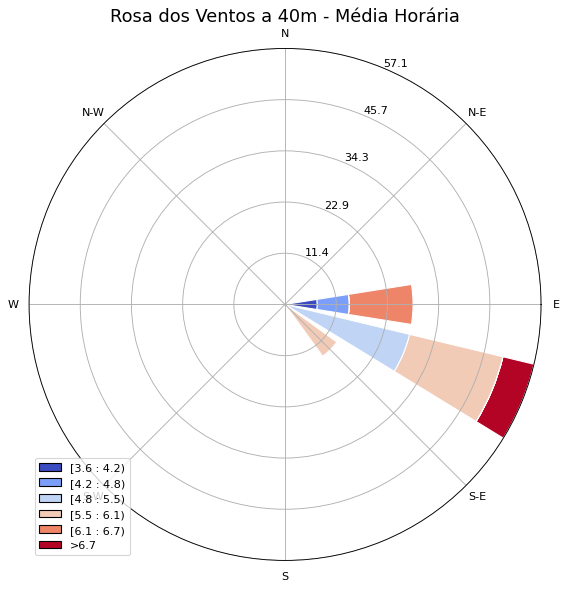

In [14]:
# Plotar a rosa dos ventos para a altura de 140 metros com média horária e um mapa de cores diferente
ax = ds.wind_graph.plot_wind_rose(140, averaging_window='1h', colormap='coolwarm')
ax.set_title("Rosa dos Ventos a 40m - Média Horária", fontsize=16)
plt.show()

# Salvar a figura
ax.figure.savefig('../figures/rosa_dos_ventos_140m_horario.png')

### Geração de Tabela de Distribuição de Vento

A função `generate_wind_distribution_table` tem como objetivo gerar uma tabela de distribuição cumulativa ou binned de vento. Cada linha pode representar a frequência cumulativa para velocidades de vento abaixo de um determinado limite ou a frequência dentro de intervalos de velocidade, enquanto cada coluna representa direções de vento agrupadas em bins de ±15° ao redor de um valor central (por exemplo, 30°, 60°, etc.).

Essa função é útil para análise de frequência de vento em diferentes direções e velocidades e pode ser usada para gerar tabelas que resumem as características do vento em diferentes alturas.

#### Parâmetros:
- **height (int)**: A altura em metros na qual calcular a distribuição de vento.
- **speed_thresholds (list, opcional)**: Lista com os limites de velocidade do vento (em m/s). O padrão é [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32].
- **direction_bins (list, opcional)**: Lista com os limites de bins de direção do vento (em graus). O padrão é [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360].
- **period (str, opcional)**: Um parâmetro opcional para filtrar dados de uma estação meteorológica específica ou mês. As estações podem ser representadas pelas siglas "DJF" (Verão), "MAM" (Outono), "JJA" (Inverno), e "SON" (Primavera). Além disso, também pode ser especificado um mês, como "January" (Janeiro), "February" (Fevereiro), etc.
- **mode (str, opcional)**: O modo de cálculo. Pode ser "accumulate" para probabilidades cumulativas ou "bins" para probabilidades distribuídas em intervalos. O padrão é "accumulate".

#### Retorno:
- **pd.DataFrame**: Um DataFrame contendo a tabela de distribuição de vento, onde as linhas são os limites de velocidade do vento (cumulativos ou intervalos) e as colunas são os bins de direção do vento, além de uma coluna "Omni" para a soma das frequências em todas as direções.

In [15]:
# Geração da tabela de distribuição de vento a 140 metros de altura
wind_distribution_table = ds.wind_table.generate_wind_distribution_table(140)

# Exibição da tabela gerada
print(wind_distribution_table)

Direction     N   NNE   ENE      E     ESE   SSE     S   SSW   WSW     W  \
Degrees      0°   30°   60°    90°    120°  150°  180°  210°  240°  270°   
0-1        0.00  0.00  0.00   0.00    0.00  0.00  0.00  0.00  0.00  0.00   
1-2        0.00  0.00  4.55  45.45   50.00  0.00  0.00  0.00  0.00  0.00   
2-3        0.00  0.23  5.88  72.09   21.57  0.23  0.00  0.00  0.00  0.00   
3-4        0.00  0.00  1.66  69.97   27.78  0.59  0.00  0.00  0.00  0.00   
4-5        0.00  0.00  0.57  28.54   67.50  3.38  0.00  0.00  0.00  0.00   
5-6        0.00  0.00  0.31  18.77   75.07  5.85  0.00  0.00  0.00  0.00   
6-7        0.00  0.00  0.61  37.72   56.27  5.40  0.00  0.00  0.00  0.00   
7-8        0.00  0.00  0.29  63.93   34.80  0.97  0.00  0.00  0.00  0.00   
8-9        0.00  0.00  0.00  68.36   31.64  0.00  0.00  0.00  0.00  0.00   
9-10       0.00  0.00  0.00  25.62   74.38  0.00  0.00  0.00  0.00  0.00   
10-11      0.00  0.00  0.00   0.00  100.00  0.00  0.00  0.00  0.00  0.00   
11-12      0

O arquivo que estávamos usando para teste possui, na verdade, dados apenas para as primeiras 10 horas do dia 08 de agosto de 2024. Por conta disso, a tabela de distribuição gerada anteriormente não apresentou muitos valores, o que pode dificultar uma análise mais abrangente da funcionalidade. Para podermos ter uma visão mais clara e completa do potencial dessa função, utilizaremos agora um arquivo de teste criado especificamente para este guia. Este novo arquivo contém dados fictícios para o ano de 2023, com velocidades de vento geradas a partir de uma distribuição Weibull aleatória, e uma resolução temporal de 1 hora. Com esse novo arquivo, iremos criar um novo objeto `ReadWindCubeAccessor` e construir a tabela de distribuição de vento para análise.

In [16]:
# Criando o novo objeto ReadWindCubeAccessor com o arquivo de teste fictício
ds_dummy = WindDataAccessor.windcube("../testdata/dummy_data_2023.rtd", reference_height=100)

# Gerar a tabela de distribuição de vento a 140 metros de altura para o ano de 2023
wind_distribution_table_test = ds_dummy.wind_table.generate_wind_distribution_table(140)

# Exibir a tabela gerada
print(wind_distribution_table_test)

Direction      N    NNE     ENE      E    ESE    SSE      S    SSW    WSW  \
Degrees       0°    30°     60°    90°   120°   150°   180°   210°   240°   
0-1         3.75  13.75    7.50   8.75  16.25   3.75   7.50   6.25   7.50   
1-2         4.20   9.66    8.40   7.98   8.82   7.14   9.24   8.82   7.98   
2-3         5.01   8.77   10.03  12.28   5.26   9.02   9.52   8.52   9.27   
3-4         4.90   9.44   11.62   7.99   9.62  10.89   6.53   8.53   8.17   
4-5         4.76  11.49   10.34   6.73   8.54   9.69   7.72   7.72   8.21   
5-6         4.46   8.49    7.77   9.06   8.63   6.91   9.35  10.94   8.78   
6-7         4.54   9.22    9.65   8.37   8.23   7.52   9.08   7.38   9.36   
7-8         3.12   9.20    8.16   8.90   8.31   8.75   9.94   7.72   9.20   
8-9         3.62   9.46    8.76   9.04   7.79  10.01   7.37   9.18   7.79   
9-10        4.98   9.37    8.46  10.88   9.21   8.01   7.40   8.46   8.01   
10-11       6.19   7.56    7.73   8.08   7.56   7.04  10.31   9.28   9.62   

#### Exemplo de Uso: Filtrando por Mês ou Estação 
Além de gerar a tabela de distribuição para o conjunto de dados completo, podemos também filtrar por um período específico, como um mês ou uma estação do ano. 

##### Exemplo: Filtrando por Mês

In [17]:
# Gerar a tabela de distribuição de vento para o mês de Janeiro
wind_distribution_january = ds_dummy.wind_table.generate_wind_distribution_table(140, period='January')
print(wind_distribution_january)

Direction      N    NNE    ENE       E    ESE    SSE      S    SSW     WSW  \
Degrees       0°    30°    60°     90°   120°   150°   180°   210°    240°   
0-1         0.00   0.00  16.67    0.00  16.67   0.00  16.67  16.67    0.00   
1-2         7.69  11.54   7.69    7.69   0.00   3.85  11.54   7.69    3.85   
2-3         7.41   0.00  11.11    0.00   7.41  14.81  11.11   7.41   11.11   
3-4         2.22  11.11  11.11    8.89  11.11   6.67   4.44  15.56    8.89   
4-5         4.76  14.29   9.52    4.76   7.94  14.29   6.35   7.94    3.17   
5-6         6.00  10.00   8.00   12.00   4.00   4.00   6.00  10.00   12.00   
6-7         2.04   6.12  12.24   10.20   6.12   6.12  10.20   8.16   12.24   
7-8         3.92  13.73   5.88    9.80   7.84   5.88   7.84   9.80    5.88   
8-9         4.11  13.70   9.59    6.85  10.96   6.85   8.22  15.07    2.74   
9-10        9.52   7.94   9.52   11.11   3.17   3.17   6.35   6.35    7.94   
10-11       9.52   2.38   9.52   14.29   7.14   4.76   4.76  14.

##### Exemplo: Filtrando por Estação (Verão)

In [18]:
# Gerar a tabela de distribuição de vento para o verão (Dezembro, Janeiro, Fevereiro)
wind_distribution_summer = ds_dummy.wind_table.generate_wind_distribution_table(140, period='DJF')
print(wind_distribution_summer)

Direction      N    NNE    ENE      E    ESE    SSE      S    SSW    WSW  \
Degrees       0°    30°    60°    90°   120°   150°   180°   210°   240°   
0-1         5.56   5.56   5.56   5.56  22.22   5.56   5.56   5.56  11.11   
1-2         3.23  11.29   8.06   4.84  11.29   1.61   8.06  11.29   8.06   
2-3         3.41   4.55  12.50   6.82   2.27   9.09  11.36  10.23  10.23   
3-4         2.63   7.02  11.40   6.14  11.40  14.04   4.39  11.40   7.02   
4-5         5.45  12.73  10.30   5.45   8.48  10.91   7.27   5.45   6.67   
5-6         6.83   9.94   6.83   9.94   7.45   8.70   7.45   9.94   8.70   
6-7         3.59   8.38   9.58   7.78   5.99   7.78  10.18   4.79  12.57   
7-8         2.44   9.15   7.93  12.20   8.54   7.32   8.54   9.76   7.32   
8-9         3.19  10.11   8.51  10.11   8.51   7.98   5.85  10.64   6.38   
9-10        7.23  10.24  10.84  10.84   6.02   4.82   8.43   6.02   7.23   
10-11       7.69   6.15  10.77   7.69   9.23   4.62   6.15  11.54   7.69   
11-12       

Também é possível fazer o gráfico da rosa dos ventos para um mês ou estação específico:

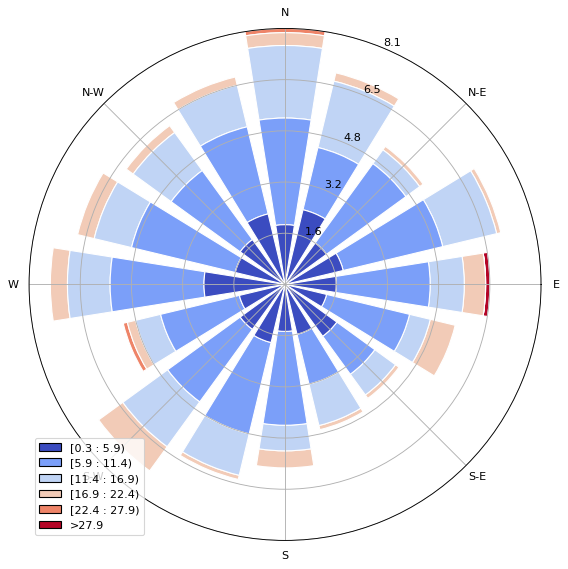

In [19]:
# Plotar a rosa dos ventos para 140 metros no mês de janeiro
ax = ds_dummy.wind_graph.plot_wind_rose(140, colormap='coolwarm', period='January')
plt.show()

#### Exemplo de Uso: Usando bins ao invés de valores acumulados

Nesse caso, o uso do argumento 'mode' em conjunto com a opção 'bins' faz com que cada linha represente a frequência relativa de ocorrência de valores entre os limites determinados na primeira coluna, sendo que o valor da esquerda é incluído, enquanto que os valores têm que ser menores que o valor à direita. 

Por exemplo, se o intervalo for `2-3`, isso significa que estamos considerando a frequência de ocorrência de velocidades de vento maiores ou iguais a 2 m/s e menores que 3 m/s. Cada coluna da tabela representa um bin de direção do vento, com cada valor indicando a porcentagem de ocorrência relativa àquela direção específica dentro do intervalo de velocidade.

A tabela gerada com o modo 'bins' é útil para entender a distribuição do vento em diferentes faixas de velocidade e direções, permitindo uma análise detalhada dos padrões de vento em uma determinada altura.

In [20]:
# Definir opções para mostrar todas as linhas e colunas
wind_distribution_bins = ds_dummy.wind_table.generate_wind_distribution_table(140, mode='bins')
print(wind_distribution_bins)

Direction      N    NNE     ENE      E    ESE    SSE      S    SSW    WSW  \
Degrees       0°    30°     60°    90°   120°   150°   180°   210°   240°   
0-1         3.75  13.75    7.50   8.75  16.25   3.75   7.50   6.25   7.50   
1-2         4.20   9.66    8.40   7.98   8.82   7.14   9.24   8.82   7.98   
2-3         5.01   8.77   10.03  12.28   5.26   9.02   9.52   8.52   9.27   
3-4         4.90   9.44   11.62   7.99   9.62  10.89   6.53   8.53   8.17   
4-5         4.76  11.49   10.34   6.73   8.54   9.69   7.72   7.72   8.21   
5-6         4.46   8.49    7.77   9.06   8.63   6.91   9.35  10.94   8.78   
6-7         4.54   9.22    9.65   8.37   8.23   7.52   9.08   7.38   9.36   
7-8         3.12   9.20    8.16   8.90   8.31   8.75   9.94   7.72   9.20   
8-9         3.62   9.46    8.76   9.04   7.79  10.01   7.37   9.18   7.79   
9-10        4.98   9.37    8.46  10.88   9.21   8.01   7.40   8.46   8.01   
10-11       6.19   7.56    7.73   8.08   7.56   7.04  10.31   9.28   9.62   

### Geração de Tabela de Cobertura de Dados

A função `generate_data_coverage_table` gera uma tabela de cobertura de dados que verifica a quantidade de dados faltantes ao longo do tempo. Cada linha da tabela representa um mês, enquanto cada coluna representa um dia do mês. A célula correspondente mostra a porcentagem de cobertura de dados disponível para aquela combinação de mês e dia.

Além disso, a função possui um argumento opcional `plot` que, quando definido como `True`, gera um gráfico visual da cobertura de dados, semelhante ao apresentado na imagem anterior. Esse gráfico utiliza um heatmap para mostrar visualmente a presença (ou ausência) de dados ao longo do tempo, facilitando a análise rápida de lacunas na coleta de dados.

Essa funcionalidade é extremamente útil para verificar a qualidade dos dados antes de realizar qualquer análise mais detalhada, garantindo que não existam grandes períodos com falta de dados.

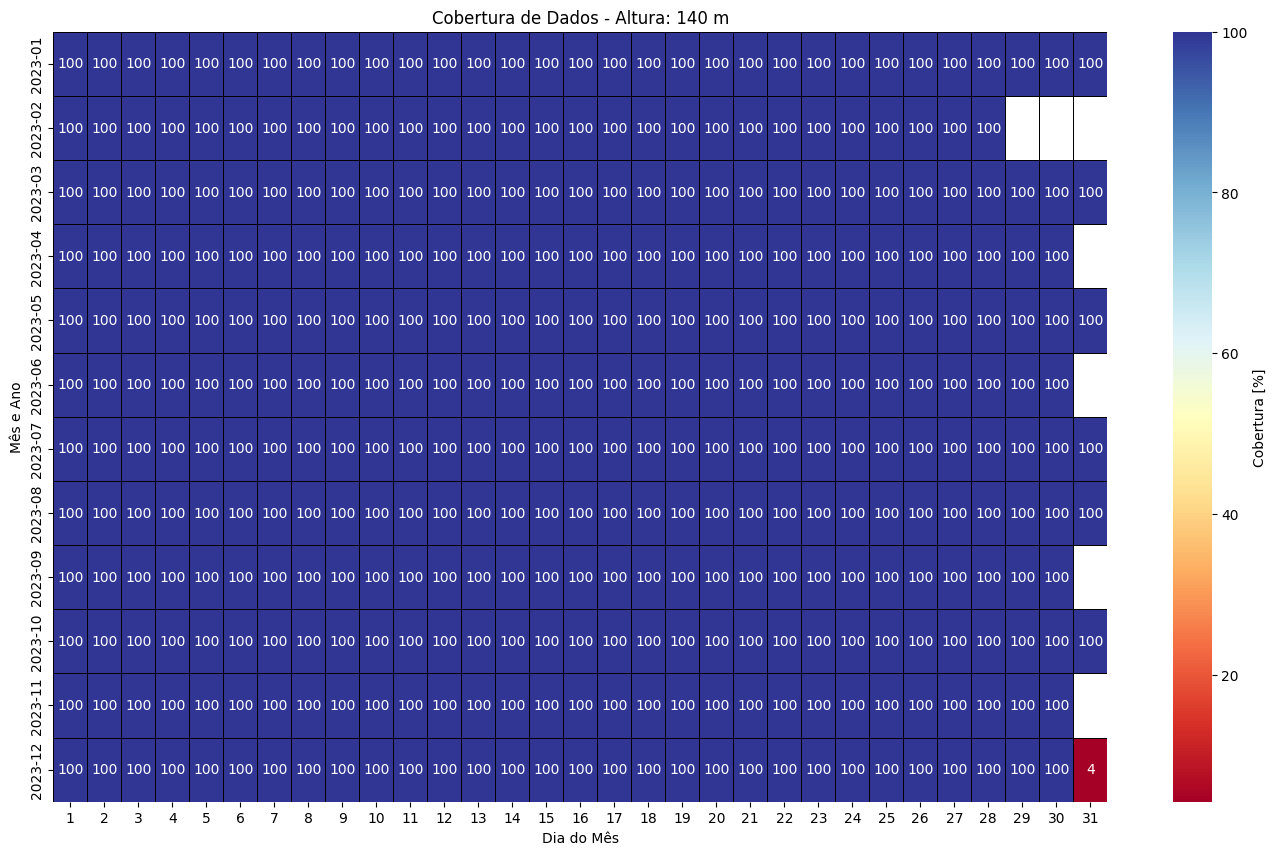

(<Axes: title={'center': 'Cobertura de Dados - Altura: 140 m'}, xlabel='Dia do Mês', ylabel='Mês e Ano'>, day         1      2      3      4      5      6      7      8      9      10  \
month                                                                           
2023-01  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-02  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-03  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-04  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-05  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-06  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-07  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-08  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
2023-09  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0  100.0   
202

In [21]:
coverage_table = ds_dummy.wind_table.generate_data_coverage_table(140, plot=True)
print(coverage_table)

### Geração de Tabela de Velocidade Média do Vento por Hora e Mês

A função `generate_average_wind_speed_table` gera uma tabela contendo os valores médios da velocidade do vento para cada hora do dia, separados por mês, além de agrupamentos sazonais (verão, outono, inverno e primavera) e uma média global. Cada linha da tabela representa uma hora do dia, enquanto cada coluna representa um mês ou um agrupamento sazonal.

A última linha da tabela representa a média mensal de velocidade do vento para cada coluna. A função também possui um argumento opcional `plot`, que, quando definido como `True`, cria um gráfico visual da tabela. As cores do gráfico representam a razão entre a velocidade média do vento e a velocidade máxima, facilitando a interpretação dos padrões sazonais e diários da velocidade do vento.

Essa funcionalidade é útil para identificar padrões de vento ao longo do dia e das estações do ano, proporcionando uma visão detalhada dos comportamentos de vento em diferentes períodos.



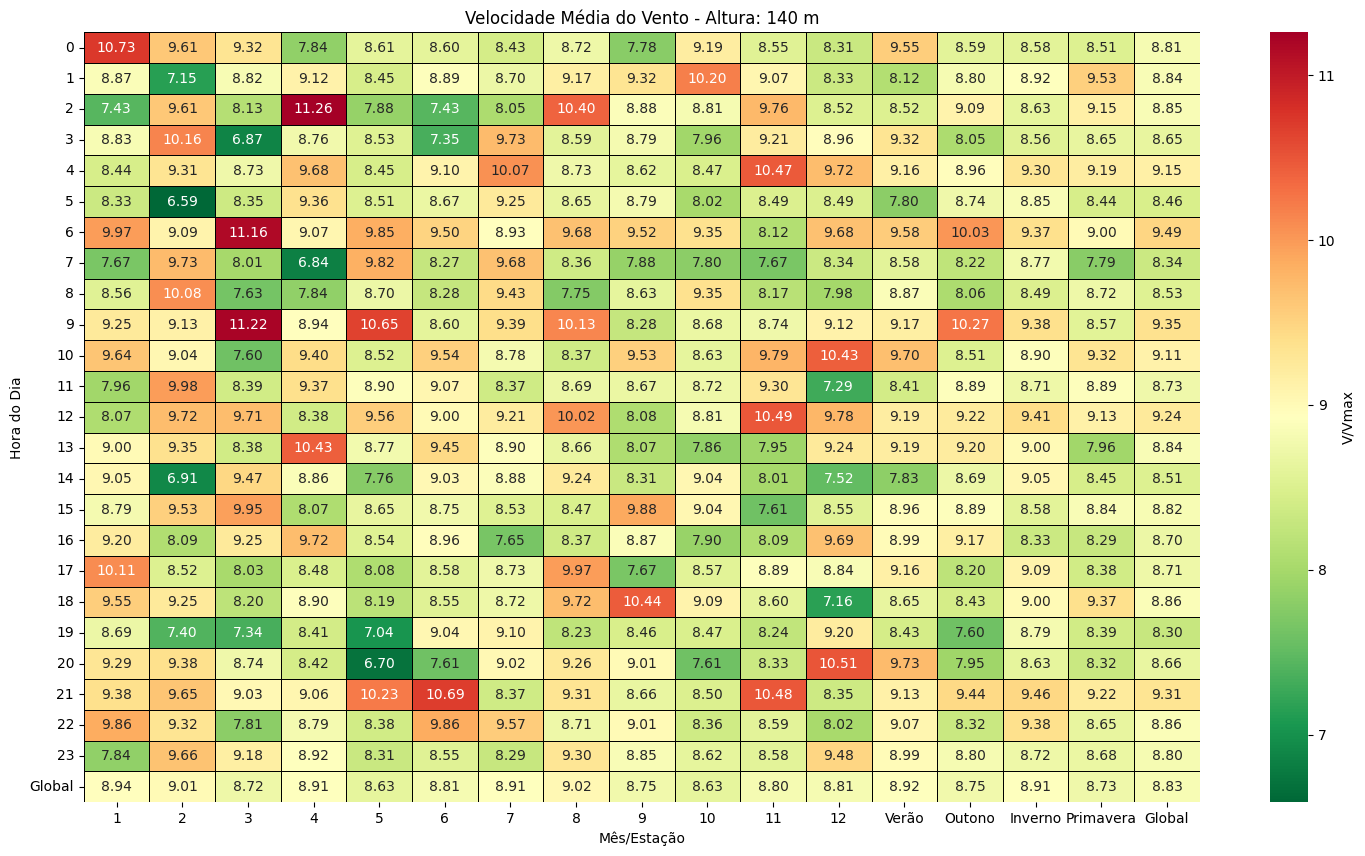

(<Axes: title={'center': 'Velocidade Média do Vento - Altura: 140 m'}, xlabel='Mês/Estação', ylabel='Hora do Dia'>, month       1      2      3      4      5      6      7      8      9     10  \
hour                                                                           
0       10.73   9.61   9.32   7.84   8.61   8.60   8.43   8.72   7.78   9.19   
1        8.87   7.15   8.82   9.12   8.45   8.89   8.70   9.17   9.32  10.20   
2        7.43   9.61   8.13  11.26   7.88   7.43   8.05  10.40   8.88   8.81   
3        8.83  10.16   6.87   8.76   8.53   7.35   9.73   8.59   8.79   7.96   
4        8.44   9.31   8.73   9.68   8.45   9.10  10.07   8.73   8.62   8.47   
5        8.33   6.59   8.35   9.36   8.51   8.67   9.25   8.65   8.79   8.02   
6        9.97   9.09  11.16   9.07   9.85   9.50   8.93   9.68   9.52   9.35   
7        7.67   9.73   8.01   6.84   9.82   8.27   9.68   8.36   7.88   7.80   
8        8.56  10.08   7.63   7.84   8.70   8.28   9.43   7.75   8.63   9.35   
9   

In [22]:
average_wind_speed_table = ds_dummy.wind_table.generate_average_wind_speed_table(140, plot=True)
print(average_wind_speed_table)
plt.show()

### Geração de Tabela de Máxima Mudança de Direção do Vento

O **WindLab** oferece uma função poderosa chamada `generate_maximum_wind_change_table`, que permite analisar a relação entre a variabilidade da direção do vento e a velocidade média em diferentes intervalos de tempo e alturas.

#### Função `generate_maximum_wind_change_table`

Essa função cria uma tabela de frequência que relaciona os intervalos de mudança máxima na direção do vento (colunas) com os intervalos de velocidade média do vento (linhas) ao longo de uma janela deslizante de tempo especificada. Além disso, a função pode gerar um gráfico de dispersão visualizando a relação entre esses dois parâmetros.

#### Parâmetros de Entrada:
- **height** (*int*): A altura (em metros) para a qual os cálculos serão realizados.
- **second_window** (*int*): O tamanho da janela deslizante (em segundos) usada para calcular a mudança máxima na direção do vento e a velocidade média. O padrão é 10 segundos.
- **plot** (*bool*, opcional): Define se um gráfico de dispersão será gerado. O padrão é `False`.

#### Retorno:
- **DataFrame**: Um DataFrame com a tabela de frequência das combinações de intervalos de velocidade média e mudanças máximas de direção.
- **ax** (*opcional*): Um objeto de eixo do Matplotlib contendo o gráfico de dispersão, caso `plot=True`.

#### Notas:
- A tabela apresenta os intervalos de velocidade média como linhas e os intervalos de mudança máxima na direção do vento como colunas.
- Inclui colunas e linhas para valores maiores que os limites superiores das faixas definidas.
- **Observação**: Esta função pode levar algum tempo para finalizar a execução, pois realiza comparações para todos os valores dentro da janela de tempo especificada. Dependendo do tamanho do dataset e da janela escolhida, a análise pode ser demorada.

#### Exemplo Prático:

Neste exemplo, utilizamos uma série de arquivos de dados para calcular a tabela de máxima mudança de direção do vento em uma altura específica e gerar um gráfico de dispersão:

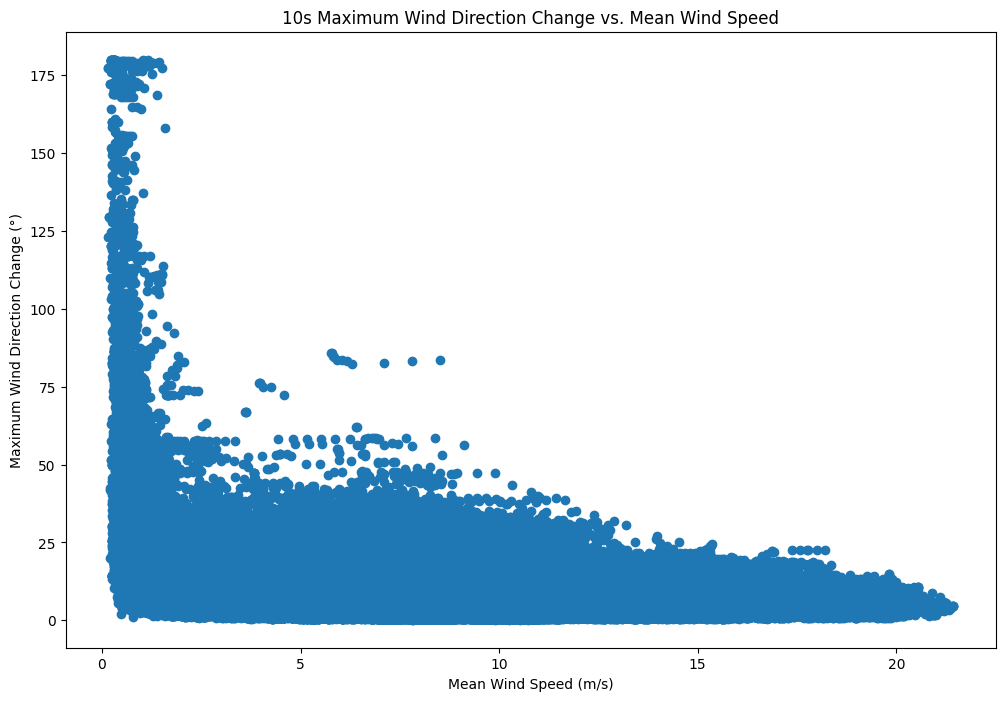

                  0-5       5-10     10-15     15-20     20-25     25-30  \
0-1               110        843      1146      1080      1000       842   
1-2              1303       4991      5345      4196      3139      1817   
2-3              5064      12219      6394      2562      1108       385   
3-4              9508      15600      6071      1663       532       246   
4-5             16181      22430      7593      1866       505       295   
5-6             26239      29133      7249      1462       401       278   
6-7             50952      46297      8723      1431       603       434   
7-8            119098      68891     10893      1877       936       732   
8-9            165526      73949      9992      1771       863       623   
9-10           138241      59008      7373      1253       686       357   
10-11          124834      47191      6172       802       282       148   
11-12           81428      45254      5861       620       253        62   
12-13       

In [38]:
from glob import glob

# Carregar dados do WindCube a partir de arquivos .rtd
files = sorted(glob("../testdata/2024/WLS*.rtd"))
ds_202408 = WindDataAccessor.windcube(files, reference_height=40)

# Gerar a tabela de máxima mudança de direção do vento e plotar os resultados
height = 80  # Altura em metros
ax, max_wind_change_table = ds_202408.wind_table.generate_maximum_wind_change_table(height, plot=True)

# Exibir a tabela gerada
print(max_wind_change_table)

### Cálculo do desvio padrão e remoção de tendência dos dados

O **WindLab** oferece uma função útil para calcular o desvio padrão de variáveis dos dados de vento, após remover as tendências temporais. Essa operação é útil para identificar a variabilidade do vento em diferentes alturas e durante diferentes intervalos de tempo.

Função `compute_std_detrended_data`

Essa função realiza o cálculo do desvio padrão para uma variável, utilizando uma janela deslizante para suavizar as variações e remover tendências de longo prazo. É flexível para ser aplicada diretamente a um xarray.DataArray.

#### Parâmetros de entrada:

- **dataset** *(xarray.DataArray)*: Os dados contidos em um objeto xarray.DataArray, representando uma variável como a velocidade ou direção do vento.

- **window_size** *(int)*: Tamanho da janela deslizante (em número de passos no tempo) para o cálculo do desvio padrão. O padrão é 600 passos no tempo, mas pode ser ajustado conforme necessário.

#### Exemplo prático:

Abaixo, calculamos o desvio padrão com remoção de tendência para a velocidade do vento a 40 metros de altura e, em seguida, plotamos o resultado ao longo do tempo.

[0.44381485 0.44381485 0.4438342  ... 0.37336946 0.37336946 0.36958432]


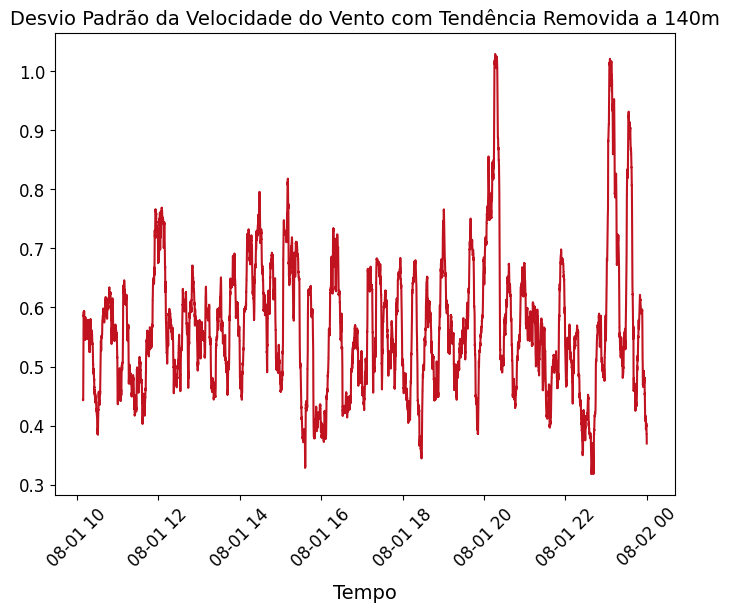

In [31]:
# Importar a função
from windlab.processing.utils import compute_std_detrended_data

# Seleciona os dados da velocidade do vento a 40 metros
data = ds['Wind Speed (m/s)'].sel(height=140)

# Calcula o desvio padrão com remoção de tendência
std = compute_std_detrended_data(dataset=data)

# Exibe os valores calculados
print(std.values)

# Importar biblioteca de plotagem
import matplotlib.pyplot as plt

# Plotar o desvio padrão ao longo do tempo
plt.figure(figsize=(8,6))
plt.plot(data.time.values, std.values, c='#c1121f')
plt.title('Desvio Padrão da Velocidade do Vento com Tendência Removida a 140m', fontsize=14)
plt.xlabel('Tempo', labelpad=10, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Exemplo: Cálculo do desvio padrão com remoção de tendência e plotagem da velocidade do vento a 140 metros

Agora, vamos plotar a série temporal da velocidade do vento real e do desvio padrão calculado para podermos comparar visualmente ambas as séries

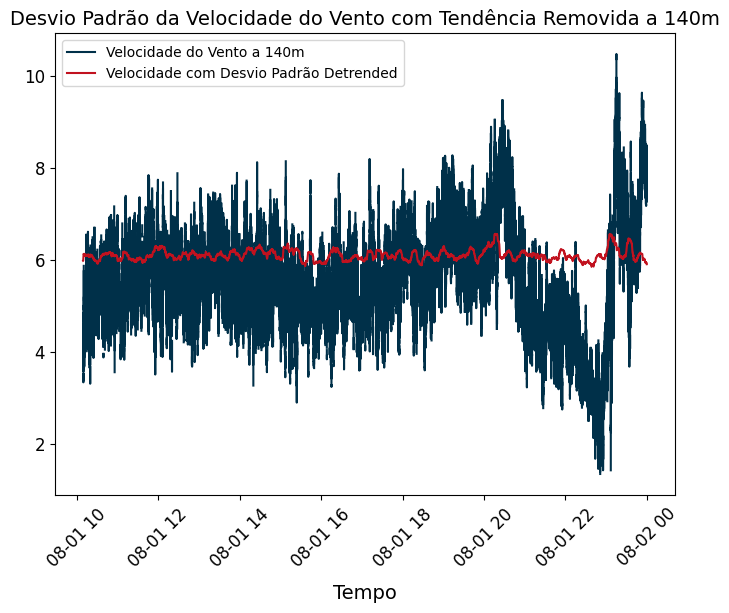

In [34]:
# Importar biblioteca de plotagem
import matplotlib.pyplot as plt

# Plotar o desvio padrão ao longo do tempo junto com a velocidade do vento original
plt.figure(figsize=(8,6))
plt.plot(data.time.values, data.values, c='#003049', label='Velocidade do Vento a 140m')
plt.plot(data.time.values, (std + data.mean()).values, c='#c1121f', label='Velocidade com Desvio Padrão Detrended')
plt.title('Desvio Padrão da Velocidade do Vento com Tendência Removida a 140m', fontsize=14)
plt.xlabel('Tempo', labelpad=10, fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()